# Import Statements

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

In [149]:
mydf = pd.read_csv('2020-XTern-DS.csv')

In [150]:
mydf['Rating'].replace('-', np.nan, inplace=True)
mydf['Rating'].replace('NEW', np.nan, inplace=True)
mydf['Rating'].replace('Opening Soon', np.nan, inplace=True)
mydf['Votes'].replace('-', np.nan, inplace=True)
mydf['Reviews'].replace('-', np.nan, inplace=True)
mydf['Cook_Time'] = mydf['Cook_Time'].str.replace(' minutes', '')
mydf['Average_Cost'] = mydf['Average_Cost'].str.replace('$', '').str.replace(',', '')
mydf['Minimum_Order'] = mydf['Minimum_Order'].str.replace('$', '')

In [151]:
mydf['Cook_Time'] = mydf['Cook_Time'].astype(float)
mydf['Minimum_Order'] = mydf['Minimum_Order'].astype(float)
mydf['Average_Cost'] = mydf['Average_Cost'].astype(float)
mydf['Votes'] = mydf['Votes'].astype(float)
mydf['Reviews'] = mydf['Reviews'].astype(float)
mydf['Rating'] = mydf['Rating'].astype(float)

In [152]:
mydf.shape

(2019, 10)

In [209]:
mydf.drop_duplicates(keep=False,inplace=True)
mydf.duplicated().sum()
##dropping and checking duplicated data

0

In [210]:
mydf.dropna(inplace=True)
mydf.isnull().sum()
##dropping and checking unavailable/null data

Restaurant       0
Latitude         0
Longitude        0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Cook_Time        0
dtype: int64

# Data Visualization

In [181]:
myList = mydf.groupby(['Restaurant']).Average_Cost.max().sort_values(ascending=False).head(5)

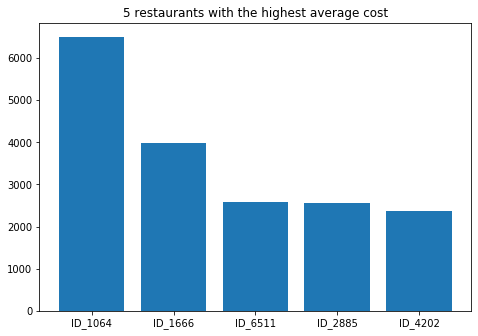

In [195]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = myList.index
students = myList.values
ax.bar(langs,students)
plt.title('5 restaurants with the highest average cost')
plt.show()

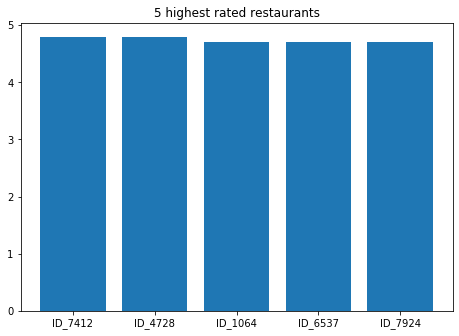

In [196]:
myList = mydf.groupby(['Restaurant']).Rating.max().sort_values(ascending=False).head(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = myList.index
students = myList.values
ax.bar(langs,students)
plt.title('5 highest rated restaurants')
plt.show()

In [197]:
myList = mydf.groupby(['Restaurant']).Minimum_Order.max().sort_values(ascending=False).head(5)

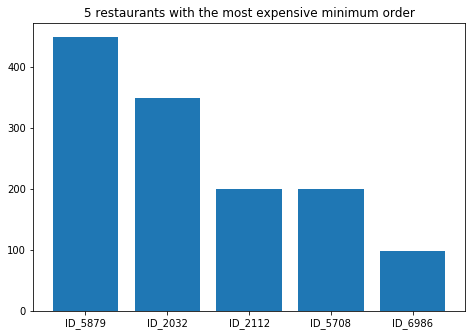

In [198]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = myList.index
students = myList.values
ax.bar(langs,students)
plt.title('5 restaurants with the most expensive minimum order')
plt.show()

In [199]:
myList = mydf.groupby(['Restaurant']).Cook_Time.min().sort_values(ascending=True).head(5)

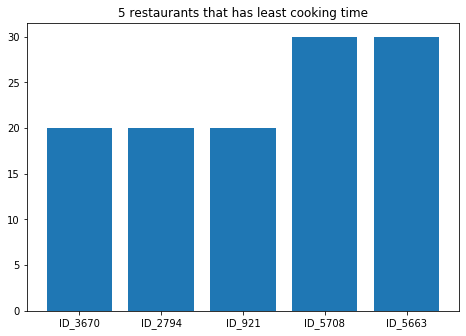

In [200]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = myList.index
students = myList.values
ax.bar(langs,students)
plt.title('5 restaurants that has least cooking time')
plt.show()

In [201]:
myList = mydf.groupby(['Restaurant']).Reviews.max().sort_values(ascending=False).head(5)

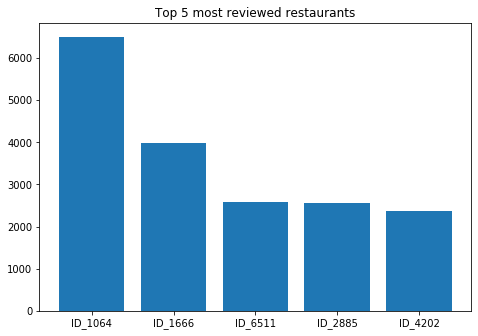

In [202]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = myList.index
students = myList.values
ax.bar(langs,students)
plt.title('Top 5 most reviewed restaurants')
plt.show()

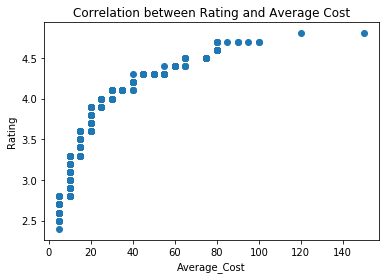

In [211]:
plt.subplots(figsize=(6, 4))
plt.scatter(mydf.Average_Cost.sort_values(ascending=True),mydf.Rating.sort_values(ascending=True))
plt.title("Correlation between Rating and Average Cost")
plt.xlabel("Average_Cost")
plt.ylabel("Rating");

# Conclusion

This might be common sense but there is a strong positive correlation between average cost and ratings. 

-If are willing to pay lots of cash, restaurants 8403, 2545, 6278, 8117, 3192 have the highest average costs.

-If you are looking for the highest rated restaurants, restaurant 7412, 4728, 1064, 6537, 7924 have the highest ratings.

-Restaurants that sets a high bar and has the most expensive minimum order are 5878, 2032, 2112, 5708, 6986

-Want a quick bite? Go to 3670, 2794, 921, 5078, 5663 for restaurants that has least cooking time

-What are the most popular restaurants currently? 1064, 1666, 6511, 2885, 4204 have the highest amount of reviews. 
